Accuracy: 0.0006666666666666666
Precision: 0.0007078754578754579
Recall: 0.0006666666666666666
F1: 0.0006866533422163002
Confusion Matrix:
 [[  1 772]
 [727   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       773
           1       0.00      0.00      0.00       727

    accuracy                           0.00      1500
   macro avg       0.00      0.00      0.00      1500
weighted avg       0.00      0.00      0.00      1500



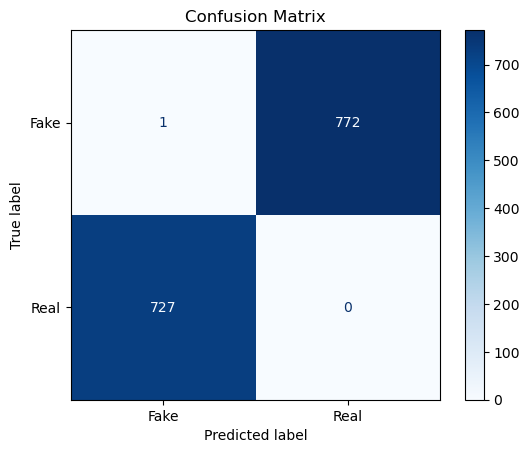

In [9]:
# 2. Εισαγωγή βιβλιοθηκών
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
)
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt


# 3. Φόρτωση των αρχείων True.csv και Fake.csv
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

# 4. Προσθήκη ετικετών (1 για REAL, 0 για FAKE)
true_df["label"] = 1
fake_df["label"] = 0

# 5. Ενοποίηση και ανακάτεμα
df = pd.concat([true_df, fake_df], ignore_index=True)
df = df[["text", "label"]].dropna()
df = df.sample(n=5000, random_state=42).reset_index(drop=True)

# 6. Διαχωρισμός σε train/test (70% / 30%) — μόνο το test μάς ενδιαφέρει
_, test_texts, _, test_labels = train_test_split(
    df["text"].tolist(),
    df["label"].tolist(),
    test_size=0.3,
    stratify=df["label"],
    random_state=42,
)

# 7. Φόρτωση μοντέλου
model_name = "vikram71198/distilroberta-base-finetuned-fake-news-detection"  # π.χ. "mrm8488/bert-tiny-finetuned-fake-news"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 8. Δημιουργία pipeline
pipeline = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=False, truncation=True)

# 9. Προβλέψεις
predictions = pipeline(test_texts, batch_size=8)
predicted_labels = [int(pred["label"].split("_")[-1]) for pred in predictions]

# 10. Αξιολόγηση
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# 11. Εκτύπωση αποτελεσμάτων
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(test_labels, predicted_labels))


# 12. Σχεδίαση του confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Fake", "Real"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()